In [1]:
import pandas as pd
from logRegClf import LogisticRegressionClf
from iwls import IWLSOptimizer
from adam import AdamOptimizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from preprocessing import read_dataframe, preprocess_dataframe 
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sgd import SGDOptimizer
from sgd import SGDOptimizer


In [2]:
datasets_paths = [
    'datasets/large/bodyfat.arff',
    'datasets/large/features.xlsx',
    'datasets/large/phpDQbeeh.arff',
    'datasets/large/phpGUrE90.arff',
    'datasets/large/puma32H.arff',
    'datasets/large/fri_c0_1000_25.arff',
    
    'datasets/small/maternal_health_risk.csv',
    'datasets/small/php8Mz7BG.arff',
    'datasets/small/rice_cammeo_osmancik.arff',
    ]

In [3]:
#benchmarking performance of classifiers
def benchmark_performance_all(dfname: str, df: pd.DataFrame, n_experiments: int = 50, with_output: bool = False):
    iwls = IWLSOptimizer()
    adam = AdamOptimizer()
    sgd = SGDOptimizer()
    
    output = {}
    
    classifiers = {
        "lr_iwls": LogisticRegressionClf(iwls, consider_interactions=False),
        "lr_adam": LogisticRegressionClf(adam, consider_interactions=False),
        "lr_sgd": LogisticRegressionClf(sgd, consider_interactions=False),
        "lda": LinearDiscriminantAnalysis(),
        "qda": QuadraticDiscriminantAnalysis(),
        "dt": DecisionTreeClassifier(),
        "rf": RandomForestClassifier()
    }
    
    for classifier in classifiers:
        clf = classifiers[classifier]
        #different train test splits foreach experiment
        x = np.linspace(0.1, 0.3, n_experiments)
        clf_tab=[]
        for i in range(n_experiments):
            X_train, X_test, y_train, y_test = preprocess_dataframe(df, test_size=x[i])
            clf.fit(X_train, y_train)
            pred = clf.predict(X_test)
            clf_tab.append(balanced_accuracy_score(y_test, pred))
        output[classifier] = clf_tab
    
    # Convert the dictionary to a DataFrame
    df_output = pd.DataFrame(output)

    # Melt the DataFrame to have a row for each value of clf_tab array
    df_melted = df_output.melt(var_name='classifier', value_name='balanced_accuracy_score')
    
    
    #generate granular plot
    plt.close()
    sns.boxplot(x='classifier', y='balanced_accuracy_score', data=df_melted)
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy Score')
    plt.title(f'Classifier Performance for {dfname}')
    plt.savefig(f'performance_all/benchmark_performance_big_{dfname}.png')
    #plt.show()
    
    
    if with_output:
        return df_melted
    else:
        return None

Processing datasets/large/bodyfat.arff
Number of rows: 252
Number of columns: 15


d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: divide by zero encountered in log
  log_loss = -np.sum(y * np.log(sigmoid_z) + (1 - y) * np.log(1 - sigmoid_z))
d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: invalid value encountered in multiply
  log_loss = -np.sum(y * np.log(sigmoid_z) + (1 - y) * np.log(1 - sigmoid_z))
d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: divide by zero encountered in log
  log_loss = -np.sum(y * np.log(sigmoid_z) + (1 - y) * np.log(1 - sigmoid_z))
d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: invalid value encountered in multiply
  log_loss = -np.sum(y * np.log(sigmoid_z) + (1 - y) * np.log(1 - sigmoid_z))
d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: divide by zero encountered in log
  log_loss = -np.sum(y * np.log(sigmoid_z) + (1 - y) * np.log(1 - sigmoid_z))
d:\mgr\aml\pr1\aml-project1\logRegClf.py:109: RuntimeWarning: invalid value encountered in multiply
  log_loss = -np.sum(y

Processing datasets/large/features.xlsx
Number of rows: 1000
Number of columns: 60


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero e

Processing datasets/large/phpDQbeeh.arff
Number of rows: 349
Number of columns: 45
Processing datasets/large/phpGUrE90.arff
Number of rows: 1055
Number of columns: 42


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn

Processing datasets/large/puma32H.arff
Number of rows: 8192
Number of columns: 33
Processing datasets/large/fri_c0_1000_25.arff
Number of rows: 1000
Number of columns: 26
Processing datasets/small/maternal_health_risk.csv
Number of rows: 1014
Number of columns: 7
Processing datasets/small/php8Mz7BG.arff
Number of rows: 5404
Number of columns: 6
Processing datasets/small/rice_cammeo_osmancik.arff
Number of rows: 3810
Number of columns: 8


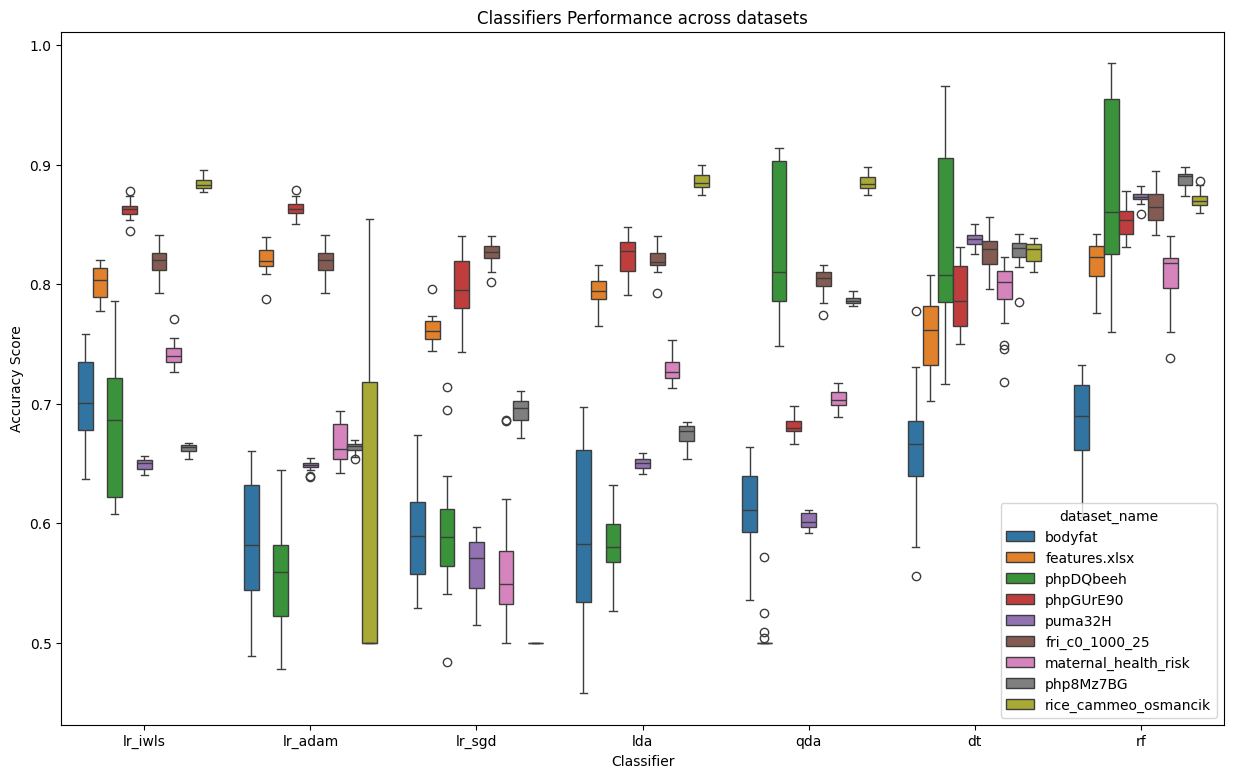

In [4]:
global_results=None
for dataset in datasets_paths:
    #generate results for each dataset and add tro global as well
    print(f'Processing {dataset}')
    df = None
    df = read_dataframe(dataset)
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    #naming cleanups
    dataset_name = dataset.replace('datasets/small/', '').replace('datasets/large/', '').replace('.arff', '').replace('.csv', '')
    data = benchmark_performance_all(dataset_name, df, 20, True)
    data['dataset_name'] = dataset_name
    if global_results is None:
        global_results = data
    else:
        global_results = pd.concat([global_results, data], ignore_index=True)

#generate granular plot for each dataset
plt.close()
plt.figure(figsize=(15, 9))
sns.boxplot(x='classifier', y='balanced_accuracy_score', data=global_results, hue='dataset_name')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Classifiers Performance across datasets')
plt.savefig('performance_all/benchmark_performance_all_models_all_datasets.png')

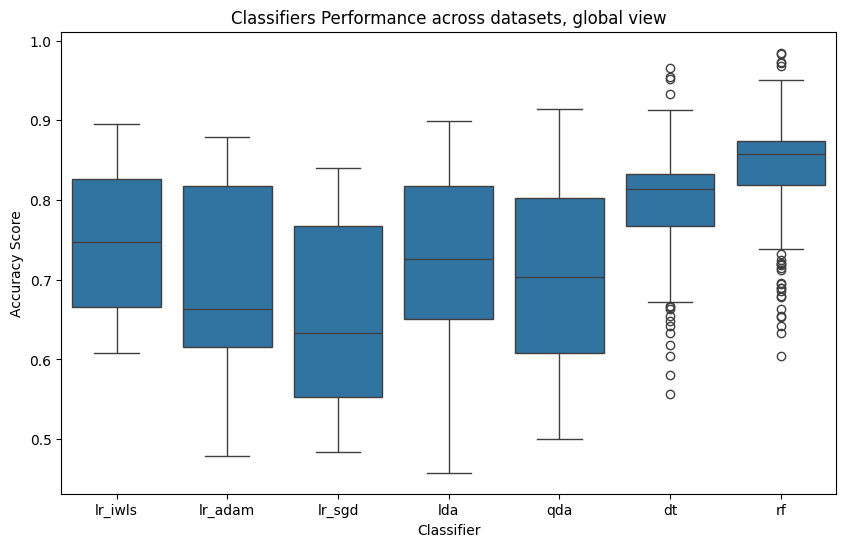

In [5]:
#generate plot aggregated across datasets
plt.close()
plt.figure(figsize=(10, 6))
sns.boxplot(x='classifier', y='balanced_accuracy_score', data=global_results)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Classifiers Performance across datasets, global view')
plt.savefig('performance_all/benchmark_performance_all_models_all_datasets_no_distinction.png')